In [1]:
# 读取数据
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
% matplotlib inline

pdData = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Logistic-Regression\\LogiReg_data.txt",
    header=None,
    names=["Exam_1", "Exam_2", "Admitted"]
)
print(pdData.shape)
pdData[:5]

# 我们的目的就是要通过exam_1和exam_2去判断最后的admitted是0还是1


(100, 3)


,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,'Exam_2 score')

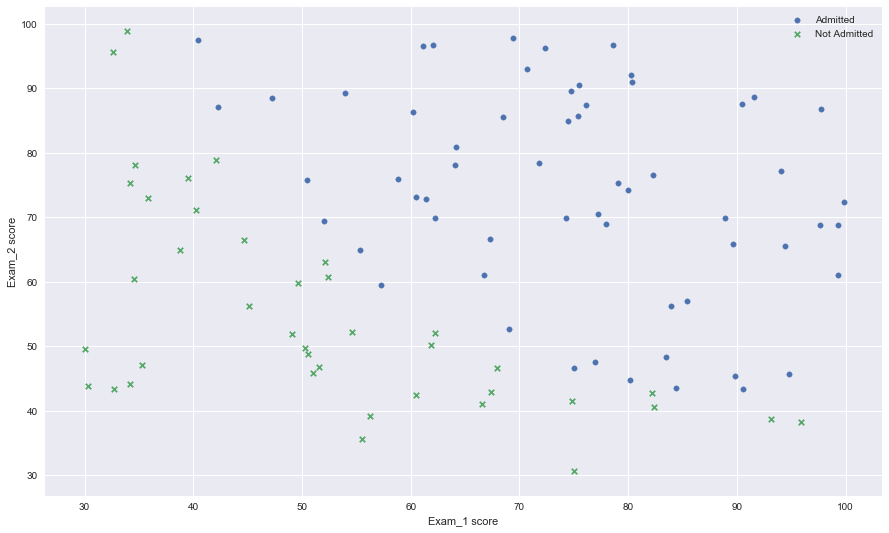

In [33]:
# 画出数据的分布
positive = pdData[pdData["Admitted"] == 1]
negative = pdData[pdData["Admitted"] == 0]

sns.set()
fig, ax = plt.subplots(figsize=(15, 9))
ax.scatter(positive["Exam_1"], positive["Exam_2"], s=30, marker="o", label="Admitted")
ax.scatter(negative["Exam_1"], negative["Exam_2"], s=30, marker="x", label="Not Admitted")
ax.legend()
ax.set_xlabel("Exam_1 score")
ax.set_ylabel("Exam_2 score")

# 可以看到绿色的点和蓝色的点，中间我们可以画一条曲线把二者全部分开，
# 这条曲线我们就可以说它是决策边界，因为是取消，我们可以说决策边界是非线性的


目标：建立分类器(求解出三个参数)
设定阈值，根据阈值判断录取结果

要完成的模块
 - sigmoid:映射到概率的模块
 - model:返回预测结果值
 - cost:根据参数计算损失
 - gradient:计算每个参数的梯度方向
 - descent:进行参数更新
 - accuracy:计算精度

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # np.exp就是计算e的多少次幂，注意这里是-z


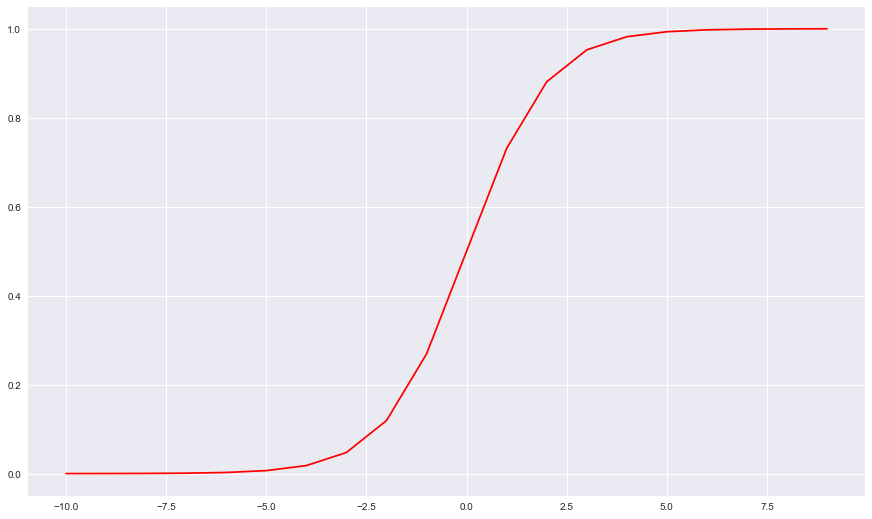

In [4]:
# 查看sigmoid的取值范围
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(nums, sigmoid(nums), "r")


In [5]:
# 返回预测值
def model(x, theta):
    return sigmoid(np.dot(x, theta.T))  #这里就是x取点乘theta.T，也就是(θ0*x0 + θ1*x1 +θi*xi)

# 因为sigmoid的返回是[0,1]，也就是可以看做一个概率，那么我们只要设定了阈值，之后我们就可以根绝这个概率计算返回是哪个分类了


In [37]:
# 在第0列的位置插入一列θ0，值为1以便计算
if pdData.columns.values[0] != "Ones":
    pdData.insert(0, "Ones", 1)

orig_data = pdData.as_matrix()
print("orig_data.shape=", orig_data.shape)
cols = orig_data.shape[1]
print("cols=", cols)
# 特征值
x = orig_data[:, 0:cols - 1]  # 所有的行，然后0:cols-1列，x里面是所有的特征值，所以最后一列admitted不需要
print("x.shape=", x.shape)
y = orig_data[:, cols - 1:cols]  # y里面就只有标签值，admitted
print("y.shape=", y.shape)

# θ占位，我们要计算的梯度就是这个
theta = np.zeros([1, 3])
print("theta.shape=", theta.shape)


orig_data.shape= (100, 4)
cols= 4
x.shape= (100, 3)
y.shape= (100, 1)
theta.shape= (1, 3)


$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [38]:
# 损失函数，对应的上面的函数
def cost(x, y, theta):
    # 将函数看成两部分
    left = np.multiply(-y, np.log(model(x, theta)))
    right = np.multiply(1 - y, np.log(1 - model(x, theta)))
    return np.sum(left - right) / len(x)  #累加


cost(x, y, theta)


0.6931471805599453

计算梯度

$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$

In [8]:
# 计算梯度，对应上面的函数
def gradient(x, y, theta):
    grad = np.zeros(theta.shape)
    # 误差
    error = (model(x, theta) - y).ravel()  #ravel()数组拉直
    for j in range(len(theta.ravel())):
        term = np.multiply(error, x[:, j])
        grad[0, j] = np.sum(term) / len(x)
    return grad  #grad，有多少个θ，grad的长度就是多少，因为每个θ都是要计算梯度的


In [9]:
# 比较三种梯度下降
# 三种停止策略
STOP_ITER = 0  #根据迭代次数
STOP_COST = 1  #根据损失的差异
STOP_GRAD = 2  #根据梯度

# 设置阈值和停止方式
def stopCriterion(type, value, threshold):
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold


In [10]:
import numpy.random

# 洗牌，打乱样本的顺序
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    x = data[:, 0:cols - 1]
    y = data[:, cols - 1:]
    return x, y


In [17]:
# 梯度下降求解
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 初始值
    init_time = time.time()
    i = 0  #1迭代次数
    k = 0  #batch
    x, y = shuffleData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(x, y, theta)]

    while True:
        # 计算梯度
        grad = gradient(x[k:k + batchSize], y[k:k + batchSize], theta)
        k += batchSize
        if k >= n:
            k = 0
            x, y = shuffleData(data)
        # 更新参数
        theta = theta - alpha * grad
        costs.append(cost(x, y, theta))
        i += 1

        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh): break

    return theta, i - 1, costs, grad, time.time() - init_time


In [18]:
# 运行
def runExpe(data, thata, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, thata, batchSize, stopType, thresh, alpha)

    name = "Original" if (data[:, 1] > 2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize == n:
        strDescType = "Gradient"
    elif batchSize == 1:
        strDescType = "Stochastic"
    else:
        strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER:
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST:
        strStop = "costs change < {}".format(thresh)
    else:
        strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12, 4))
    # 画出损失函数
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta


***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.16s


array([[-0.00027127,  0.00705232,  0.00376711]])

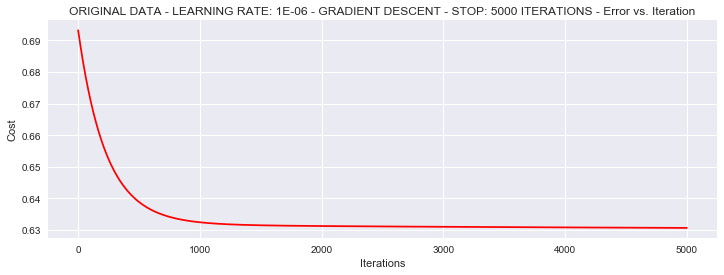

In [20]:
# 对比不同的停止策略
# 设置迭代次数
n = 100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)


***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 25.27s


array([[-5.13364014,  0.04771429,  0.04072397]])

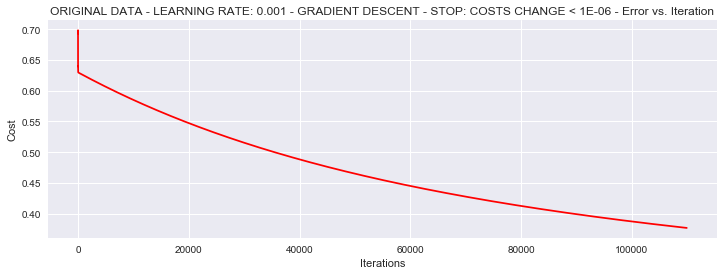

In [21]:
# 根据损失值停止
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)


***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 9.13s


array([[-2.37033409,  0.02721692,  0.01899456]])

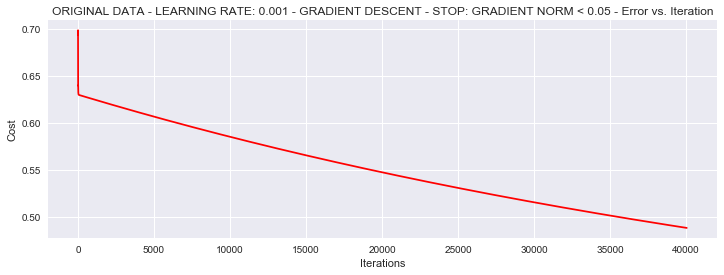

In [22]:
# 根据梯度变化停止
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)


***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.37627237  0.10381406 -0.01812946]] - Iter: 5000 - Last cost: 1.64 - Duration: 0.27s


array([[-0.37627237,  0.10381406, -0.01812946]])

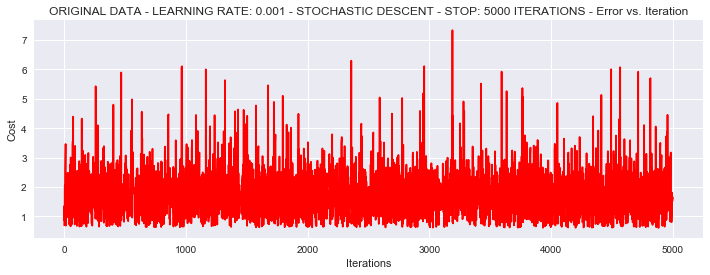

In [23]:
# 对比不同的梯度下降方法
# 随机梯度下降
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

# 看得出梯度抖动很大


***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.0006212   0.00825462  0.00273518]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.36s


array([[-0.0006212 ,  0.00825462,  0.00273518]])

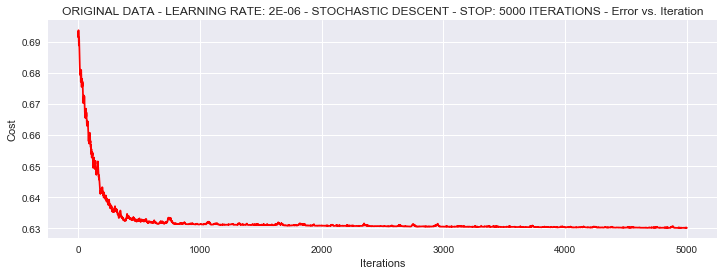

In [24]:
# 随机梯度下降，在上面的基础上，减小学习率
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.000002)

# 速度确实快，但是稳定性差，需要很小的学习率


***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03663388  0.03845783  0.03154076]] - Iter: 15000 - Last cost: 1.12 - Duration: 1.29s


array([[-1.03663388,  0.03845783,  0.03154076]])

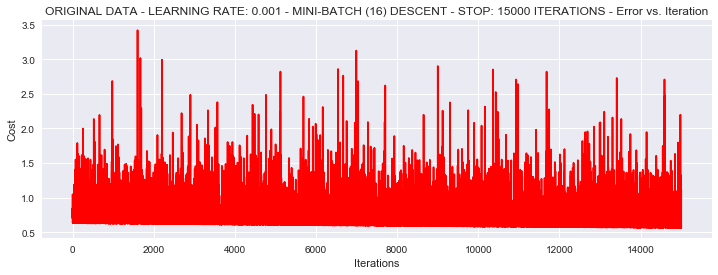

In [25]:
# 小批量梯度下降
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

# 抖动还是比较大

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.07s


array([[0.3080807 , 0.86494967, 0.77367651]])

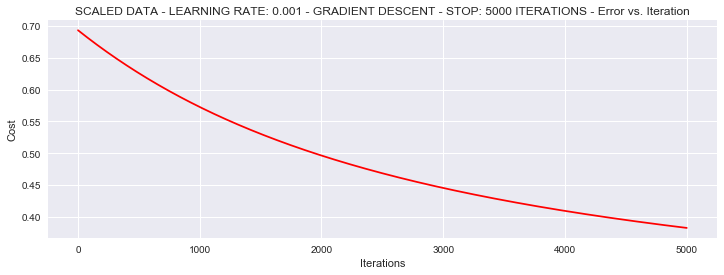

In [26]:
# 对上图的抖动，我们先不要修改梯度下降的参数。我们试着修改我们的数据，
# 看看可不可以通过修改数据的方式，优化最后的结果
# 我们对数据进行标准化，将数据按其属性(按列进行)减去其均值，然后除以其方差。
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

# 可以看到有效果了，所以我们有的时候不用先急着调整参数，可以先预处理一下数据


***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 13.78s


array([[1.0707921 , 2.63030842, 2.41079787]])

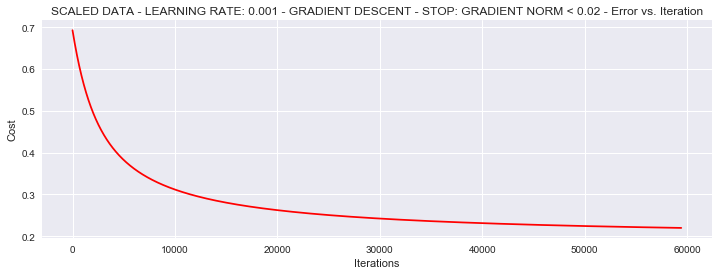

In [27]:
# 在上图的基础上，再增加迭代次数
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)


***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.14937133 2.79065732 2.56771044]] - Iter: 72610 - Last cost: 0.22 - Duration: 5.24s


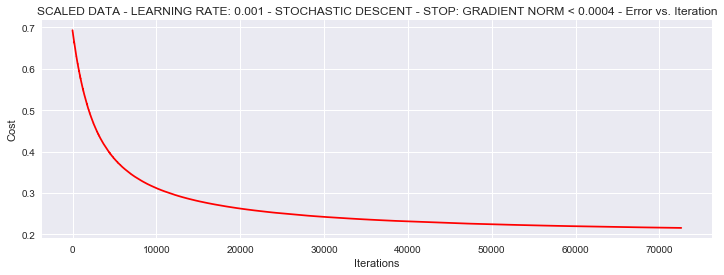

In [31]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002 / 5, alpha=0.001)


***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[0.901469   2.27504086 2.06747449]] - Iter: 38119 - Last cost: 0.23 - Duration: 3.80s


array([[0.901469  , 2.27504086, 2.06747449]])

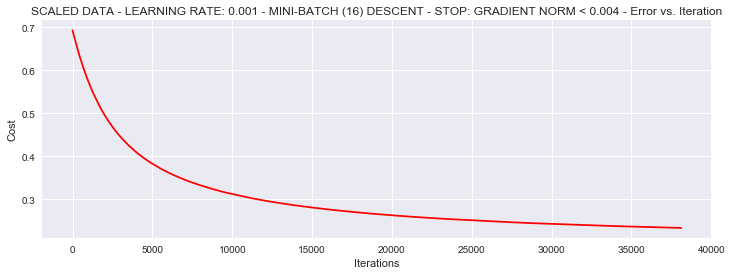

In [29]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002 * 2, alpha=0.001)


In [30]:
# 精度，判断预测值
# 设置阈值，也就是预测值是否是某一分类
def predict(x, theta):
    # 也就是说，sigmoid函数的返回，大于等于0.5的时候，认为分类为1，也就是admitted是1，其他的值的时候admitted就是0
    return [1 if x >= 0.5 else 0 for x in model(x, theta)]


In [32]:
scaled_x = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_x, theta)
# predictions里面的值和现实值作对比
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# 计算正确率是多少
accuracy = (sum(map(int, correct)) % len(correct))
print("accuracy= {0}%".format(accuracy))


accuracy= 89%
